### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
#                  alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
#           'S.Korea': 'lightgreen', 
          'France': 'violet', 
          'Poland': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,France,Poland,Argentina,Russia,Mexico,Brazil
2020-12-03,139188,1506260,276325,4745,46038,58038,49348,60210,54231,18828,39305,41173,108173,175270
2020-12-04,139700,1518670,278932,4746,46252,58852,49695,60714,54859,19359,39512,41730,108863,175964
2020-12-05,140182,1528868,281186,4746,46252,59514,50016,61111,55073,19861,39632,42228,109456,176628
2020-12-06,140573,1536056,282299,4746,46252,60078,50310,61342,55247,20089,39770,42675,109717,176941
2020-12-07,140958,1544533,283703,4746,46646,60606,50594,61531,55613,20181,39888,43122,110074,177317


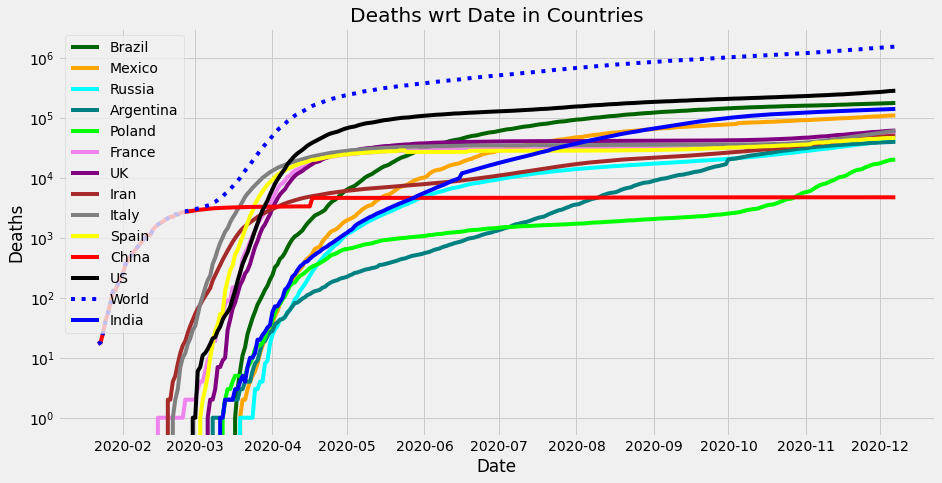

In [12]:
plotter(Deaths, 'Deaths')

In [13]:
Confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,World
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118


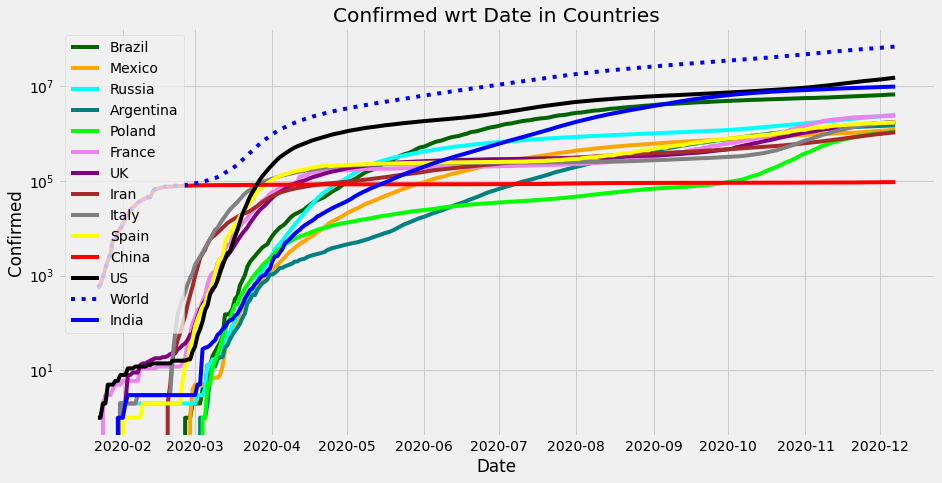

In [14]:
plotter(Confirmed, 'Confirmed')

In [15]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,France,Poland,Argentina,Russia,Mexico,Brazil
2020-12-03,540,12518,2879,1,254,993,358,414,325,620,149,543,608,755
2020-12-04,512,12410,2607,1,214,814,347,504,628,531,207,557,690,694
2020-12-05,482,10198,2254,0,0,662,321,397,214,502,120,498,593,664
2020-12-06,391,7188,1113,0,0,564,294,231,174,228,138,447,261,313
2020-12-07,385,8477,1404,0,394,528,284,189,366,92,118,447,357,376


In [16]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,France,Poland,Argentina,Russia,Mexico,Brazil
2020-12-03,506.34,10497.10,1799.40,0.31,276.62,716.91,410.15,450.50,474.31,468.09,209.86,475.46,573.25,548.72
2020-12-04,507.05,10736.21,1900.35,0.40,268.79,729.04,402.25,457.19,493.52,475.96,209.50,485.65,587.84,566.88
2020-12-05,503.92,10668.94,1944.55,0.35,235.19,720.66,392.10,449.66,458.58,479.21,198.32,487.20,588.49,579.02
2020-12-06,489.80,10233.82,1840.61,0.30,205.79,701.08,379.84,422.33,423.01,447.81,190.78,482.17,547.55,545.77
2020-12-07,476.70,10014.22,1786.03,0.27,229.32,679.44,367.86,393.16,415.88,403.34,181.68,477.78,523.73,524.55


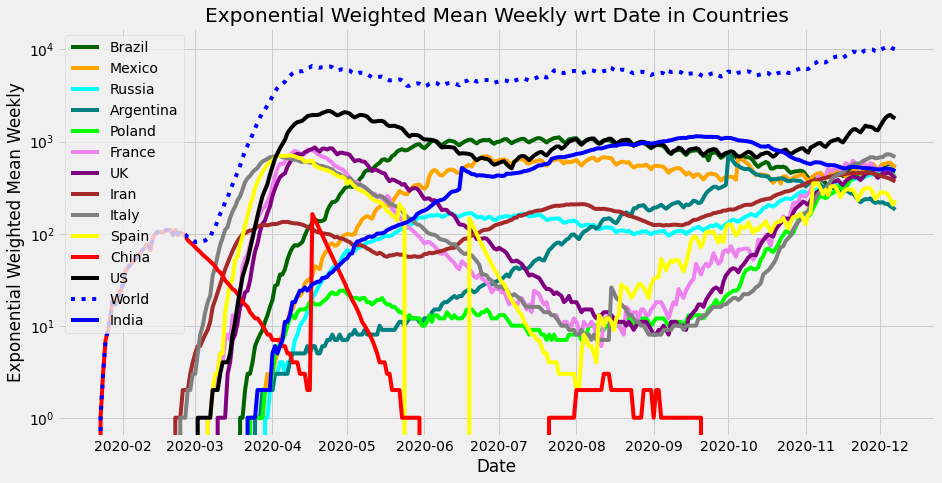

In [17]:
plotter(np.round(AVG), name)

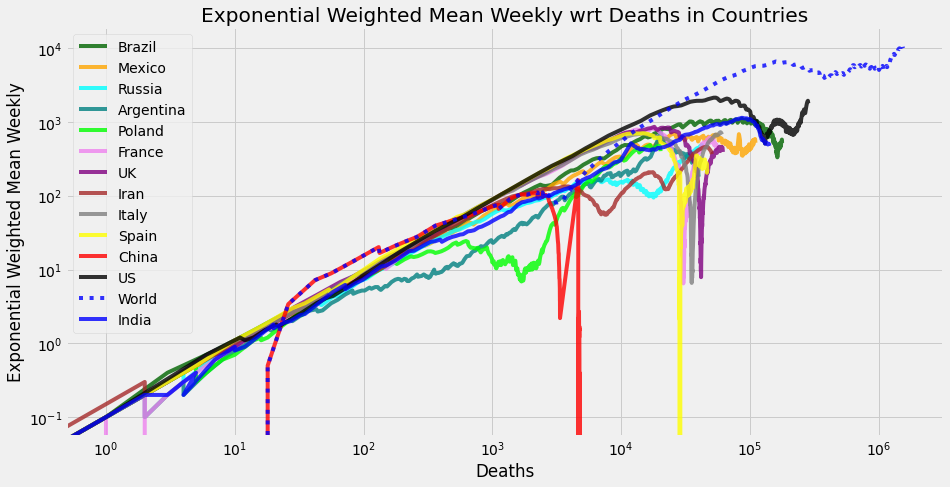

In [18]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

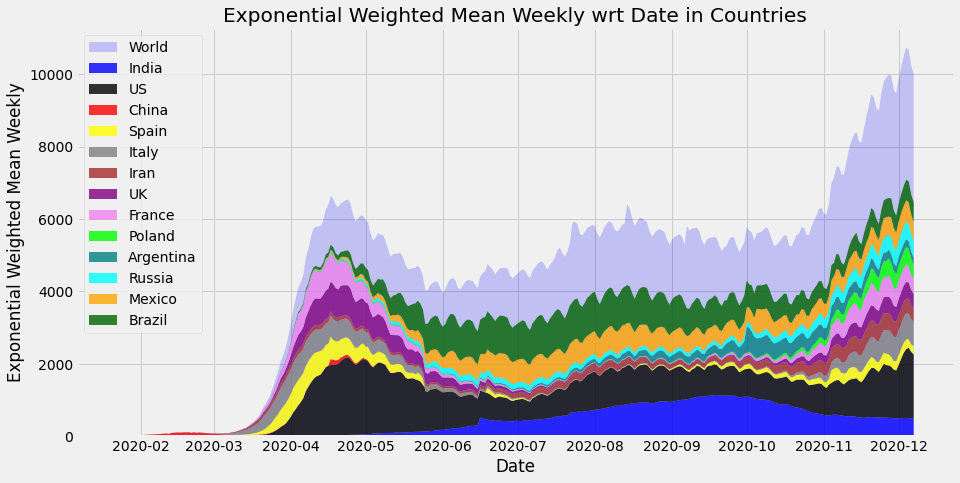

In [19]:
stackplotter(AVG, name)

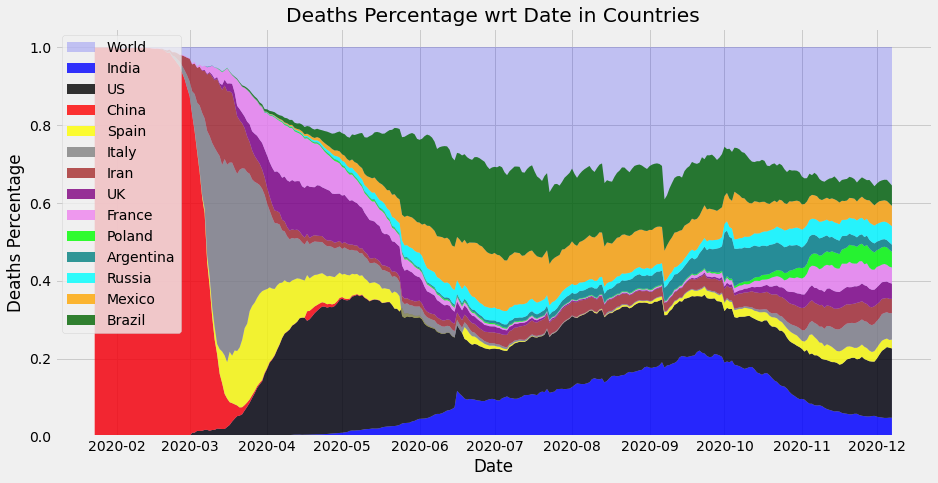

In [20]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [21]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1
Reproductivity[Countries].iloc[-1]
# plt.barh(
#     Countries,
#     Reproductivity[Countries].iloc[-1],
#     color = colors.values()
# )

Country/Region
India        0.9167
World        1.1152
US           1.4195
China        1.0000
Spain        0.8611
Italy        1.1672
Iran         0.8074
UK           1.0303
France       0.7909
Poland       1.0449
Argentina    0.8292
Russia       1.2220
Mexico       1.1932
Brazil       1.1981
Name: 2020-12-07 00:00:00, dtype: float64

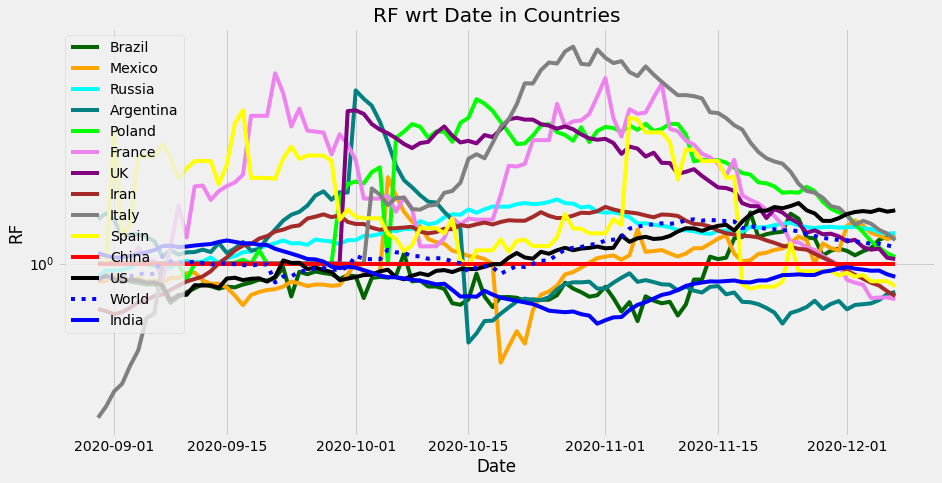

In [22]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [23]:
# We take the number of infected to be 500 times the number of deaths 
# because thats the highest it has gone up in a district
# The max death rate has been 0.2%

Testrate = Confirmed/(Deaths*500)

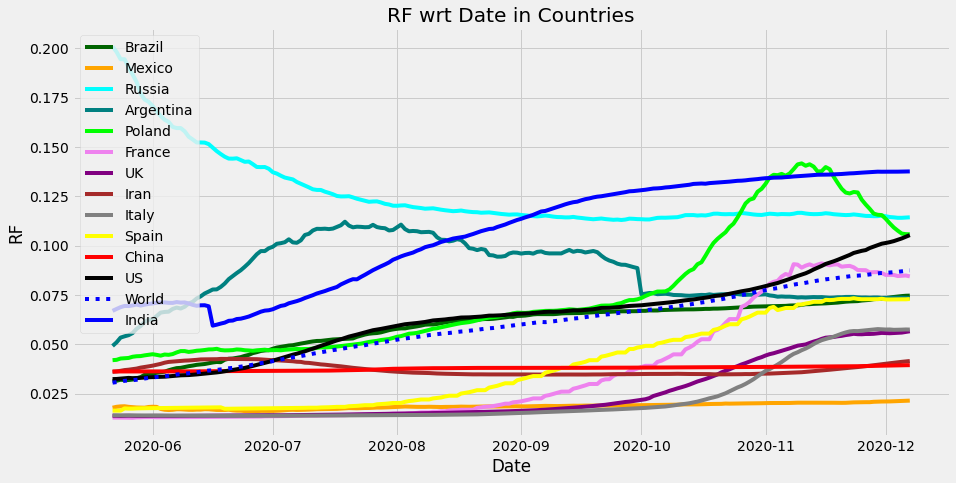

In [24]:
plotter(Testrate.tail(200), 'RF', scale= 'linear')

### Time Adjusted for starting day

In [25]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

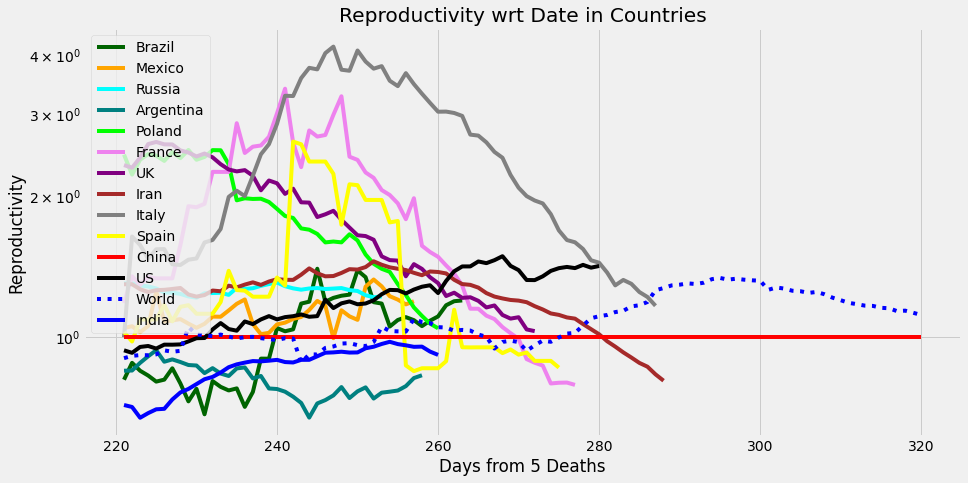

In [26]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

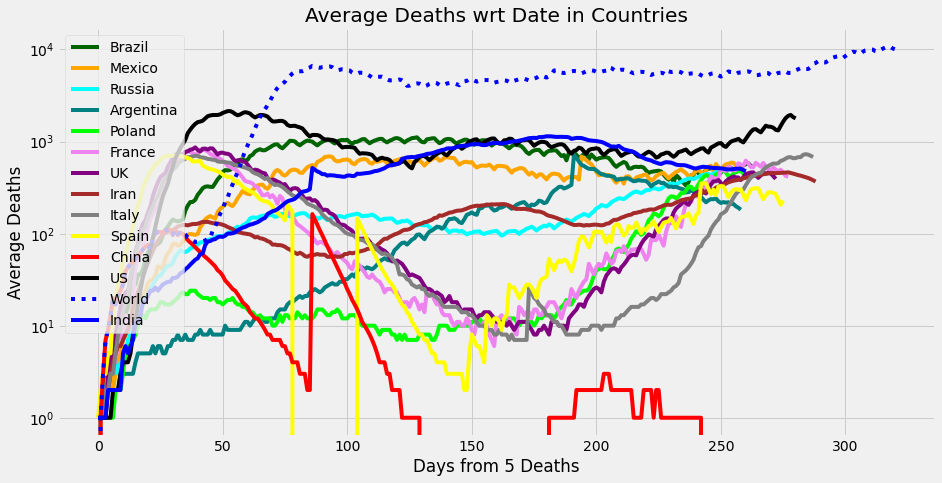

In [27]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

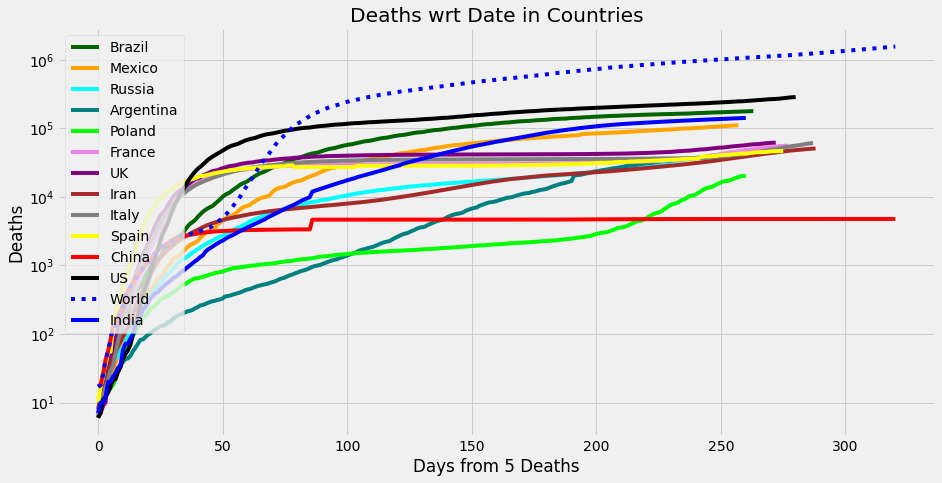

In [28]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [29]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]

In [30]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate
Country,,,,,,,
World,1544533,8477,10867.86,10014.22,1.1152,67591203,0.087523
US,283703,1404,2236.86,1786.03,1.4195,14949299,0.105387
Brazil,177317,376,599.57,524.55,1.1981,6623911,0.074713
India,140958,385,476.71,476.70,0.9167,9703770,0.137683
Mexico,110074,357,590.57,523.73,1.1932,1182249,0.021481
UK,61531,189,426.57,393.16,1.0303,1742525,0.056639
Italy,60606,528,718.57,679.44,1.1672,1742557,0.057504
France,55613,366,399.14,415.88,0.7909,2349059,0.084479
Iran,50594,284,335.43,367.86,0.8074,1051374,0.041561


In [31]:
LastDay_DF[LastDay_DF['Weekly_Deaths']>300].sort_values('Weekly_Deaths', ascending = False)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate
Country,,,,,,,
World,1544533,8477,10867.86,10014.22,1.1152,67591203,0.087523
US,283703,1404,2236.86,1786.03,1.4195,14949299,0.105387
Italy,60606,528,718.57,679.44,1.1672,1742557,0.057504
Brazil,177317,376,599.57,524.55,1.1981,6623911,0.074713
Mexico,110074,357,590.57,523.73,1.1932,1182249,0.021481
Russia,43122,447,518.71,477.78,1.2220,2466961,0.114418
India,140958,385,476.71,476.70,0.9167,9703770,0.137683
Poland,20181,92,433.00,403.34,1.0449,1067870,0.105829
UK,61531,189,426.57,393.16,1.0303,1742525,0.056639


In [32]:
LastDay_DF[LastDay_DF['Deaths']>2000].sort_values('Testrate', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate
Country,,,,,,,
Israel,2924,7,7.43,8.03,1.0000,346797,0.237207
Serbia,2005,56,57.29,51.78,2.1406,226209,0.225645
Austria,3897,57,101.86,93.16,1.3389,305693,0.156886
Jordan,3116,60,52.14,56.92,0.8718,244069,0.156655
Kazakhstan,2490,2,8.14,7.35,1.0000,180777,0.145202
Japan,2299,40,31.86,25.05,1.0000,164434,0.143048
Bangladesh,6874,36,32.86,31.53,1.2739,479743,0.139582
India,140958,385,476.71,476.70,0.9167,9703770,0.137683
Croatia,2233,59,63.86,58.85,1.4371,152239,0.136354


### Pie Chart

In [33]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:]
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  10867


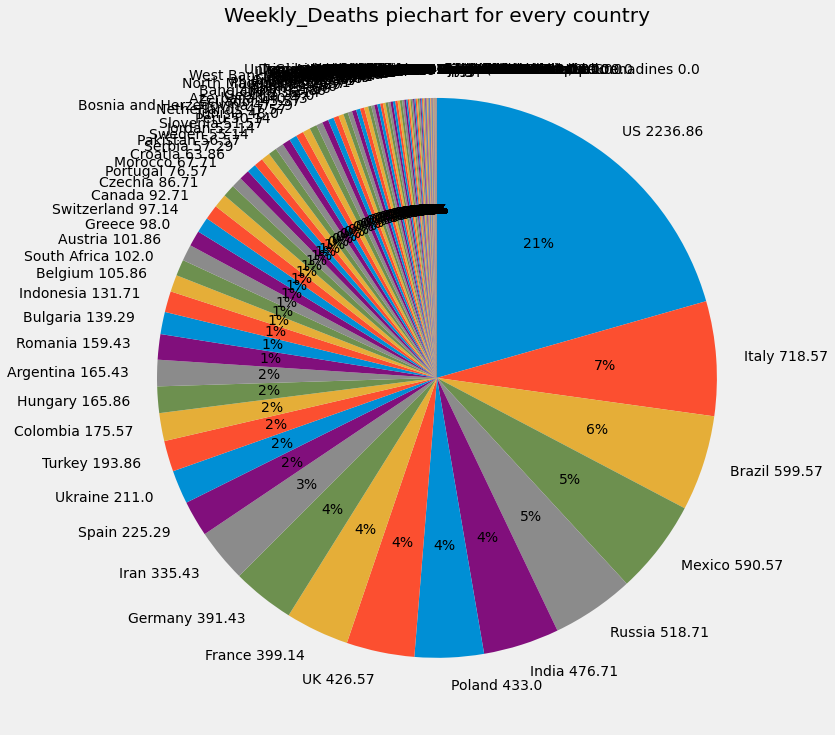

In [34]:
piechart('Weekly_Deaths')

World total:  8477


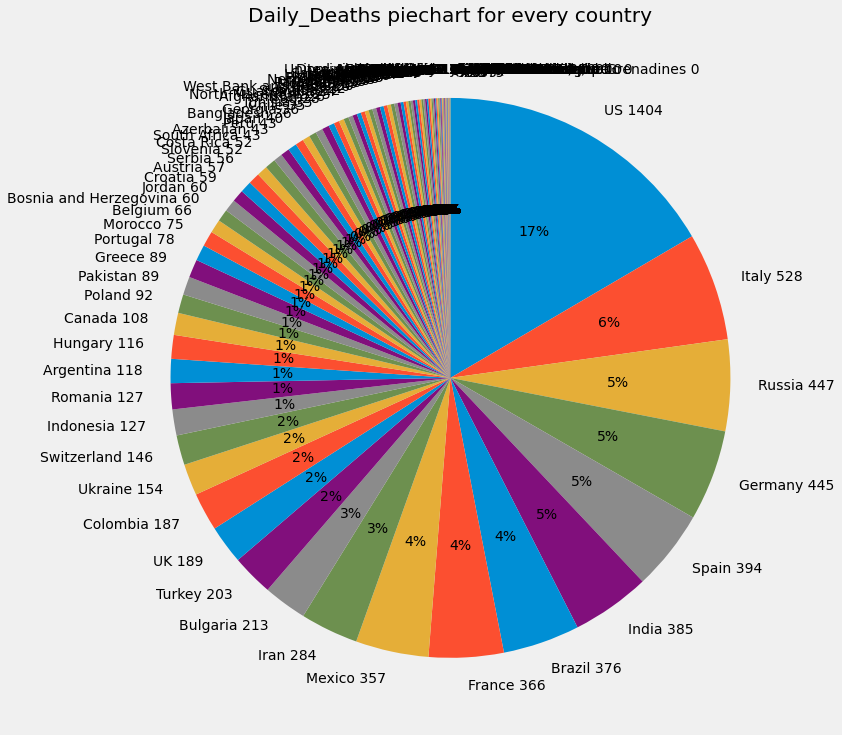

In [35]:
piechart('Daily_Deaths')

In [36]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2020-12-08


In [37]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/0.002

772266500.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>